## Описание проекта

Цель представленного проекта заключается определении наилучшего тарифа, используемого клиентами компании "Мегалайн".

Для решения данной задачи в нашем распоряжении имеются данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра»

Для достижения данной цели в проекте будут осуществлены: 
1. Предобработка данных: приведение данных к нужным типам, исправление ошибок.
2. Предварительные расчеты: 
   - кол-ва звонков, сообщений, интернет-трафика для каждого пользователя по месяцам; 
   - помесячной выручки с каждого пользователя. 
3. Анализ данных: выявление поведения клиентов двух тарифов на основании харакетристик распределения минут разговора, кол-ва сообщений и объема интернет-трафика. 
4. Проверка гипотез: 
   - о равенстве средней выручки пользователей тарифов "Ультра" и "Смарт"
   - о равенстве средней выручки пользователей из Москвы и регионов.
5. Формулирование выводов


Описание тарифов

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
  - минута разговора: 1 рубль
  - сообщение: 1 рубль
  - 1 Гб интернет-трафика: 150 рублей

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Содержание 

1. [Изучение общей информации о данных](#introduction) <br>
2. [Подготовка данных](#paragraph1)<br>
    2.1 [Изменение типы данных](#subparagraph1)<br>
    2.2 [Исправление ошибок в данных](#subparagraph2)<br>
    2.3 [Предварительные расчеты](#subparagraph3)<br>
3. [Анализ поведения клиентов оператора](#paragraph3)<br>
    3.1 [Фильтрация выбросов в данных](#subparagraph4)<br> 
4. [Проверка гипотез](#paragraph4)<br>
    4.1 [Проверка первой гипотезы](#subparagraph5)<br>
    4.2 [Проверка второй гипотезы](#subparagraph6)<br>
5. [Общий вывод](#paragraph5)<br>

## 1. Изучение общей информации <a name="introduction"></a>


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
#Изучим информацию о пользователях
users = pd.read_csv('/datasets/users.csv')
users.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 229.6 KB


In [2]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


В таблице с информацией о пользователях 7 столбцов (2 столбца с числовыми данными (id и возраст пользователя) и 6 столбцов с объектами (имя, фамилия пользователя, дата подключения и прекращения пользования тарифом, город проживания, название тарифного плана).

In [3]:
#изучим информцию об интернет-трафике 
internet = pd.read_csv('/datasets/internet.csv')
internet.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.2 MB


In [4]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


В таблице с информацией об интернет-сессиях 4 столбца (2 столбца с числовыми данными (объем потраченного за сессию интернет-трафика, идентификатор пользователя) и 2 столбца с объектами (id пользователя, дата интернет-сессии). 

In [5]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [6]:
#изучим информацию о звонках
calls = pd.read_csv('/datasets/calls.csv')
calls.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6 MB


In [7]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [8]:
#изучим информацию о сообщениях
messages = pd.read_csv('/datasets/messages.csv')
messages.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 16.4 MB


In [9]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


В таблице с информацией о сообщениях 3 столбца (1 столбец с числовыми данными (идентификатор пользователя, отправившего сообщение) и 2 столбца с объектами (уникальный номер сообщения, дата сообщения)).

In [10]:
#изучим информацию о тарифах 
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 364.0 bytes


In [11]:
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## 2. Подготовка данных <a name="paragraph1"></a>


### 2.1 Изменение типа данных  <a name="subparagraph1"></a>

*В таблицах сalls,users, messages, internet есть столбцы с датами, значения которых нужно привести к формату datetime*

In [12]:
#напишем функцию для приведения столбцов к формату datetime и добавления столбца со значением месяца
def date_format(dataframes):
    for data in dataframes:
        for column in data.columns:
            if 'date' in column:
                data[column] = pd.to_datetime(data[column], format='%Y-%m-%d')
                data['month'] = data[column].apply(lambda x: x.month)

In [13]:
#приведем значенияв столбцах 'reg_date', 'churn_date' в таблице users
#в столбце 'call_date' в таблице calls
#в столбце 'message_date' в таблице messages
#в столбце 'session_date' в таблице internet к формату datetime
date_format([users, calls, messages, internet])

### 2.2 Исправление ошибок в данных <a name="subparagraph2"></a>

*2.2.1 Изучим дубликаты, пропуски и возможные аномалии в таблице с пользователями*

In [14]:
#Посмотрим на пропуски в таблице с информацией о пользователях
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
month           0
dtype: int64

В таблице "users" обнаружены пропуски в столбце дата прекращения пользования тарифом (462 пропуска). Однако пропуски не случайные. Отсутствие данных указывает на то, что тариф действовал на момент выгрузки данных.

In [15]:
#Проверим таблицу с информацией о пользователях на наличие дубликатов
users.duplicated().sum()

0

Полные дубликаты не обнаружены.

*2.2.2 Изучим пропуски и возможные аномалии в таблице со звонками*

In [16]:
calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
month        0
dtype: int64

Посмотрим на условие: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

In [17]:
#округлим длительность звонков в большую сторону
calls['duration'] = calls['duration'].apply(lambda x: math.ceil(x))

Text(0, 0.5, 'Частота')

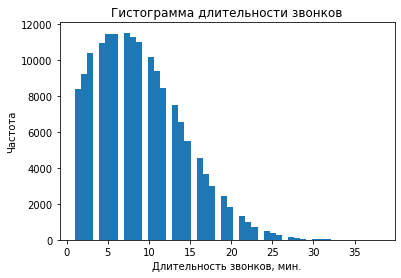

In [93]:
#построим гистограмму распределения длительности звонков
calls['duration'].plot(kind='hist', bins=50)
plt.title('Гистограмма длительности звонков')
plt.xlabel("Длительность звонков, мин.")  
plt.ylabel("Частота")

Наблюдаем пик в районе 0 - т.е. значительное количество звонков длительностью до минуты

In [19]:
#посчитаем количество звонков, имеющих нулевую длительность
calls.loc[calls['duration'] == 0.00, 'duration'].count()

39613

20% всех звонков в датасете с длительностью 0 минут. Поскольку звонки с нулевой длительностью не приносят выручку телеком компании, след-но не помогут в формировании выводов, удалим данные строки.

In [20]:
calls['duration'] = calls['duration'].replace(0, np.NaN)
calls = calls.dropna()

Text(0, 0.5, 'Частота')

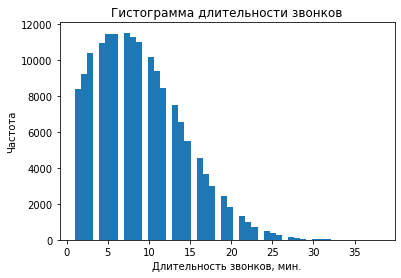

In [21]:
#посмотрим вновь на гистограмму с распределением длительности звонков
calls['duration'].plot(kind='hist', bins=50)
plt.title('Гистограмма длительности звонков')
plt.xlabel("Длительность звонков, мин.")  
plt.ylabel("Частота")

*2.2.3 Изучим пропуски и возможные аномалии в таблице с сообщениями*

In [22]:
messages.isna().sum()

id              0
message_date    0
user_id         0
month           0
dtype: int64

Данные полные, пропуски отсутствуют.

2.2.4 Изучим пропуски и возможные аномалии в таблице с интернет-трафиком

In [23]:
internet['mb_used'] = internet['mb_used'].astype(int)

In [24]:
internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
month           0
dtype: int64

Данные полные, пропуски отсутствуют.

In [25]:
#Округлим значения мегабайтов в большую сторону
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.0,2018-11-25,1000,11
1,1,1000_1,1052.0,2018-09-07,1000,9
2,2,1000_2,1197.0,2018-06-25,1000,6
3,3,1000_3,550.0,2018-08-22,1000,8
4,4,1000_4,302.0,2018-09-24,1000,9


Text(0, 0.5, 'Частота')

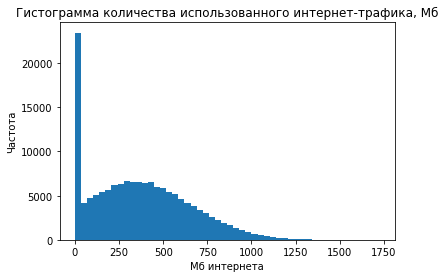

In [26]:
#посмотрим на распределение интернет-трафика
internet['mb_used'].plot(kind='hist', bins=50)
plt.title('Гистограмма количества использованного интернет-трафика, Мб')
plt.xlabel("Мб интернета")  
plt.ylabel("Частота")

Наблюдаем пик в районе интернет-сессий с нулевой длительностью.

In [27]:
#рассчитаем количество интернет-сессий с длительностью 0 минут
internet.loc[internet['mb_used'] == 0.00, 'mb_used'].count()

19699

Всего 19598 строк с нулевой длительностью интернет-сессий. Например, они могут быть пердставлены неудавшимися подключениями к интернету. Т.к. они не формируют выручку для мобильного оператора, удалим их. 

In [28]:
#удалим строки с нулевым интернет-сессиями
internet['mb_used'] = internet['mb_used'].replace(0.00, np.NaN)
internet = internet.dropna()
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.0,2018-11-25,1000,11
1,1,1000_1,1052.0,2018-09-07,1000,9
2,2,1000_2,1197.0,2018-06-25,1000,6
3,3,1000_3,550.0,2018-08-22,1000,8
4,4,1000_4,302.0,2018-09-24,1000,9


### 2.3 Предварительные расчеты <a name="subparagraph 3"></a>

*Рассчитаем:*
- количество сделанных звонков и израсходованных минут разговора по месяцам; 
- количество отправленных сообщений по месяцам; 
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя. 

In [29]:
#создадим сводную таблицу с количеством звонков
calls_pivot_id = calls.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
calls_pivot_id.columns = ['calls_count']
display(calls_pivot_id)

calls_count
user_id month             
1000    5               17
        6               28
        7               41
        8               42
        9               46
...                    ...
1498    10              30
1499    9                8
        10              44
        11              62
        12              56

[3168 rows x 1 columns]

In [30]:
#создадим сводную таблицу с длительностью звонков
calls_pivot_dur = calls.pivot_table(index = ['user_id', 'month'], values = 'duration', aggfunc = 'sum')
calls_pivot_dur.columns = ['calls_duration']
display(calls_pivot_dur)

calls_duration
user_id month                
1000    5               159.0
        6               172.0
        7               340.0
        8               408.0
        9               466.0
...                       ...
1498    10              247.0
1499    9                70.0
        10              449.0
        11              612.0
        12              492.0

[3168 rows x 1 columns]

In [31]:
#создадим сводную таблицу с количеством отправленных сообщений
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
messages_pivot.columns = ['messages_count']
display(messages_pivot)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

In [32]:
#создадим сводную таблицу с объемом израсходованного интернет-трафика
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')
internet_pivot.columns = ['mb_used_sum']
display(internet_pivot)

mb_used_sum
user_id month             
1000    5           2252.0
        6          23213.0
        7          13988.0
        8          14043.0
        9          14556.0
...                    ...
1498    10         20555.0
1499    9           1844.0
        10         17766.0
        11         17945.0
        12         13037.0

[3201 rows x 1 columns]

In [33]:
#объединим все сводные таблицы для дальнейшего расчета выручки
df = internet_pivot.merge(messages_pivot.merge(calls_pivot_id.merge(calls_pivot_dur, on=['user_id', 'month'], how='outer'), on=['user_id', 'month'], how='outer'),on=['user_id', 'month'], how='outer')
display(df)

mb_used_sum  messages_count  calls_count  calls_duration
user_id month                                                          
1000    5           2252.0            22.0         17.0           159.0
        6          23213.0            60.0         28.0           172.0
        7          13988.0            75.0         41.0           340.0
        8          14043.0            81.0         42.0           408.0
        9          14556.0            57.0         46.0           466.0
...                    ...             ...          ...             ...
1273    12             NaN            39.0         38.0           260.0
1365    10             NaN             1.0          5.0            43.0
1377    2              NaN             2.0         20.0           179.0
1392    2              NaN             3.0          2.0            13.0
1446    8              NaN             1.0          4.0            50.0

[3214 rows x 4 columns]

In [34]:
#посмотрим на зависимость количества звонков, сообщений, интернет-трафика от месяца
#напишем функцию для отображения столбчатой диаграммы 
def month_barplot(df_categories):
    list_of_dfs = dfs
    plt.figure(figsize=(15,5))
    ax = plt.gca()
    
    list_of_colors = ['blue', 'orange', 'green']
    
    dfs_names_for_legend = ['Кол-во интернет-сессий', 'Кол-во отправленных сообщений', 'Кол-во совершенных звонков']
    list_of_legend = []
    
    for i in range(len(list_of_dfs)):
        one_of_dfs = list_of_dfs[i]
        one_of_dfs_prep = one_of_dfs.plot(x='месяц', y = i, kind = 'bar', ec = 'black', color = list_of_colors[i], 
                                          ax=ax, width=0.1, position=i)
        legend_list.append(dfs_names_for_legend[i])

In [35]:
df_1 = df.groupby('month').count().drop(columns = 'calls_duration', axis = 1)
display(df_1)

,mb_used_sum,messages_count,calls_count
month,,,
1,43,38,42
2,80,66,81
3,114,94,114
4,167,135,164
5,206,174,205
6,247,209,244
7,291,247,288
8,340,292,336
9,374,318,369


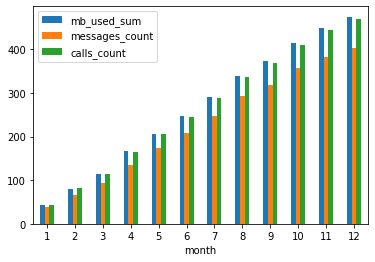

In [36]:
ax = df_1.plot.bar(rot=0)

Наблюдается тренд на постоянный рост количества звонков, сообщений и длительности интернет-сессий в течение года. Скорее всего это связано с тем, что мобильный оператор в начале года был новичком на рынке и в течение года он набирал обороты, привлекая новых пользователей.

In [37]:
#присоединим к сводной таблице информацию о тарифах 
users = users.set_index('user_id')
final_df = df.join(users[['age', 'churn_date', 'reg_date', 'city', 'tariff']], on = 'user_id', how = 'left')
display(final_df)

mb_used_sum  messages_count  calls_count  calls_duration  age  \
user_id month                                                                  
1000    5           2252.0            22.0         17.0           159.0   52   
        6          23213.0            60.0         28.0           172.0   52   
        7          13988.0            75.0         41.0           340.0   52   
        8          14043.0            81.0         42.0           408.0   52   
        9          14556.0            57.0         46.0           466.0   52   
...                    ...             ...          ...             ...  ...   
1273    12             NaN            39.0         38.0           260.0   46   
1365    10             NaN             1.0          5.0            43.0   38   
1377    2              NaN             2.0         20.0           179.0   59   
1392    2              NaN             3.0          2.0            13.0   54   
1446    8              NaN             1.0          4.0            50.0   64   

              churn_date   reg_date            city tariff  
user_id month                                               
1000    5            NaT 2018-05-25       Краснодар  ultra  
        6            NaT 2018-05-25       Краснодар  ultra  
        7            NaT 2018-05-25       Краснодар  ultra  
        8            NaT 2018-05-25       Краснодар  ultra  
        9            NaT 2018-05-25       Краснодар  ultra  
...                  ...        ...             ...    ...  
1273    12           NaT 2018-05-15          Курган  ultra  
1365    10           NaT 2018-10-31  Ростов-на-Дону  smart  
1377    2            NaT 2018-02-25          Брянск  ultra  
1392    2     2018-09-27 2018-02-27       Челябинск  ultra  
1446    8            NaT 2018-08-31          Липецк  smart  

[3214 rows x 9 columns]

In [38]:
#посмотрим на информацию о таблице
final_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1446, 8)
Data columns (total 9 columns):
mb_used_sum       3201 non-null float64
messages_count    2717 non-null float64
calls_count       3168 non-null float64
calls_duration    3168 non-null float64
age               3214 non-null int64
churn_date        187 non-null datetime64[ns]
reg_date          3214 non-null datetime64[ns]
city              3214 non-null object
tariff            3214 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(2)
memory usage: 239.5+ KB


In [39]:
#проверим наличие дубликатов
final_df.duplicated().sum()

0

In [40]:
final_df.isna().sum()

mb_used_sum         13
messages_count     497
calls_count         46
calls_duration      46
age                  0
churn_date        3027
reg_date             0
city                 0
tariff               0
dtype: int64

У нас есть пользователи, которые не пользуются сообщениями, не звонят и не пользуются интернетом. Присвоим им нулевые значения в соответствующих столбцах.

In [41]:
for i in ['mb_used_sum', 'messages_count', 'calls_count', 'calls_duration']:
    final_df[i].fillna(value=0, inplace = True)

In [42]:
#создадим функцию для расчета прибыли от звонков сверх тарифа 
def calls_profit(row):
    smart_min = tariffs['minutes_included'][0]
    ultra_min = tariffs['minutes_included'][1]
    smart_rub_per_min = tariffs['rub_per_minute'][0]
    ultra_rub_per_min = tariffs['rub_per_minute'][1]
    if row['tariff'] == 'smart':
        if row['calls_duration'] > smart_min:
            add_min_profit_s = (row['calls_duration'] - smart_min)*smart_rub_per_min
            return add_min_profit_s
        else:
            return 0
    if row['tariff'] == 'ultra':
        if row['calls_duration'] > ultra_min:
            add_min_profit_u = (row['calls_duration'] - ultra_min)*ultra_rub_per_min
            return add_min_profit_u
        else:
            return 0

In [43]:
#создадим столбец со значением прибыли для звонков сверх тарифа
final_df['extra_minutes_profit'] = final_df.apply(calls_profit, axis = 1)

In [44]:
#создадим функцию для расчета прибыли за сообщения сверх тарифа 
def sms_profit(row):
    smart_sms = tariffs['messages_included'][0]
    ultra_sms = tariffs['messages_included'][1]
    smart_rub_per_sms = tariffs['rub_per_message'][0]
    ultra_rub_per_sms = tariffs['rub_per_message'][1]
    if row['tariff'] == 'smart':
        if row['messages_count'] > smart_sms:
            add_sms_profit_s = (row['messages_count'] - smart_sms)*smart_rub_per_sms
            return add_sms_profit_s
        else:
            return 0
    if row['tariff'] == 'ultra':
        if row['messages_count'] > smart_sms:
            add_sms_profit_u = (row['messages_count'] - smart_sms)*smart_rub_per_sms
            return add_sms_profit_u
        else:
            return 0

In [45]:
#создадим столбец со значением прибыли за сообщения сверх тарифа
final_df['extra_sms_profit'] = final_df.apply(sms_profit, axis = 1)

In [46]:
#создадим функцию для расчета интернет-трафика сверх тарифа
def internet_profit(row):
    smart_mb = tariffs['mb_per_month_included'][0]
    ultra_mb = tariffs['mb_per_month_included'][1]
    smart_rub_per_mb = tariffs['rub_per_gb'][0]/1000
    ultra_rub_per_mb = tariffs['rub_per_gb'][1]/1000
    smart_monthly_fee = tariffs['rub_monthly_fee'][0]
    ultra_monthly_fee = tariffs['rub_monthly_fee'][1]
    if row['tariff'] == 'smart':
        if row['mb_used_sum'] > smart_mb:
            add_int_profit_s = (row['mb_used_sum'] - smart_mb)*smart_rub_per_mb
            return add_int_profit_s
        else:
            return 0
    if row['tariff'] == 'ultra':
        if row['mb_used_sum'] > smart_mb:
            add_int_profit_u = (row['mb_used_sum'] - smart_mb)*smart_rub_per_mb
            return add_int_profit_u
        else:
            return 0

In [47]:
#создадим столбец со значением прибыли за интернет-трафик сверх тарифа
final_df['extra_internet_profit'] = final_df.apply(internet_profit, axis = 1)

In [48]:
#создадим функцию для присвоения значения абонентской платы
def monthly_fee(row):
    if row['tariff'] == 'smart':
        return tariffs['rub_monthly_fee'][0]
    elif row['tariff'] == 'ultra':
        return tariffs['rub_monthly_fee'][1]

In [49]:
#создадим столбец со значением стоимости абонентской платы за месяц
final_df['fee_per_month'] = final_df.apply(monthly_fee, axis = 1)

In [50]:
final_df.head(50)

mb_used_sum  messages_count  calls_count  calls_duration  age  \
user_id month                                                                  
1000    5           2252.0            22.0         17.0           159.0   52   
        6          23213.0            60.0         28.0           172.0   52   
        7          13988.0            75.0         41.0           340.0   52   
        8          14043.0            81.0         42.0           408.0   52   
        9          14556.0            57.0         46.0           466.0   52   
        10         14690.0            73.0         44.0           350.0   52   
        11         14745.0            58.0         37.0           338.0   52   
        12          9808.0            70.0         38.0           333.0   52   
1001    11         18405.0             0.0         45.0           430.0   41   
        12         14018.0             0.0         47.0           414.0   41   
1002    6          10844.0             4.0         14.0           117.0   59   
        7          17557.0            11.0         21.0           214.0   59   
        8          20298.0            13.0         37.0           289.0   59   
        9          16669.0             4.0         25.0           206.0   59   
        10         13869.0            10.0         24.0           212.0   59   
        11         18566.0            16.0         25.0           243.0   59   
        12         18087.0            12.0         27.0           236.0   59   
1003    8           8557.0            37.0         43.0           380.0   23   
        9          12457.0            91.0        105.0           961.0   23   
        10         14754.0            83.0         97.0           855.0   23   
        11         11348.0            94.0         95.0           824.0   23   
        12         10111.0            75.0         88.0           802.0   23   
1004    5          13392.0            95.0          7.0            35.0   68   
        6          17586.0           134.0         25.0           171.0   68   
        7          22211.0           181.0         20.0           135.0   68   
        8          28558.0           151.0         18.0           137.0   68   
        9          15093.0           146.0         18.0           117.0   68   
        10         18457.0           165.0         21.0           145.0   68   
        11         15598.0           158.0         15.0           117.0   68   
        12         18002.0           162.0         15.0           130.0   68   
1005    1           2724.0             7.0         11.0            95.0   67   
        2           7372.0            38.0         55.0           456.0   67   
        3          11092.0            56.0         63.0           606.0   67   
        4           9341.0            41.0         77.0           712.0   67   
        5           7857.0            42.0         62.0           595.0   67   
        6           9851.0            47.0         69.0           612.0   67   
        7           7684.0            56.0         62.0           569.0   67   
        8           7535.0            64.0         64.0           619.0   67   
        9           7006.0            52.0         57.0           479.0   67   
        10          7790.0            44.0         78.0           723.0   67   
        11         12654.0            51.0         60.0           547.0   67   
        12          8656.0            54.0         63.0           592.0   67   
1006    2           1391.0             0.0          3.0            42.0   21   
        3          17266.0             0.0         36.0           286.0   21   
        4          13922.0             0.0         38.0           356.0   21   
        5          12946.0             0.0         45.0           370.0   21   
        6          12354.0             0.0         48.0           478.0   21   
        7          19950.0             0.0         38.0           316.0   21   
        8      

In [51]:
#рассчитаем совокупную помесячную выручку с каждого пользователя
final_df['total_revenue'] = final_df['extra_minutes_profit'] + final_df['extra_sms_profit'] + final_df['extra_internet_profit'] + final_df['fee_per_month']

## Шаг 3. Анализ поведения клиентов оператора <a name="paragraph3"></a>
Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистрограммы. Опишите распределения.

### 3.1 Фильтрация выбросов в данных <a name="subparagraph4"></a> 
*Отфильтруем выбросы в данных на основании диаграмм размаха*

Text(0, 0.5, 'Мб')

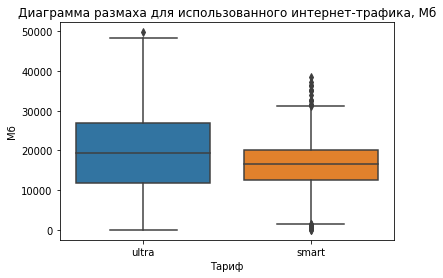

In [94]:
#построим boxplot для объема интернет-трафика
import seaborn as sns 
sns.boxplot(y = 'mb_used_sum', x = 'tariff', data = final_df)
plt.title('Диаграмма размаха для использованного интернет-трафика, Мб')
plt.xlabel("Тариф") 
plt.ylabel("Мб")

Text(0, 0.5, 'Количество сообщений')

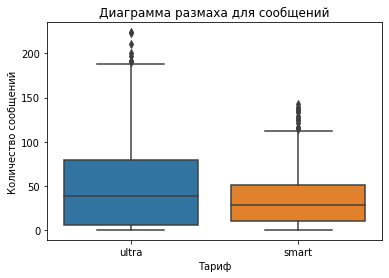

In [95]:
#построим boxplot для количества сообщений
sns.boxplot(y='messages_count', x = 'tariff', data = final_df)
plt.title('Диаграмма размаха для сообщений')
plt.xlabel("Тариф")  
plt.ylabel("Количество сообщений")

Text(0, 0.5, 'Длительность звонков')

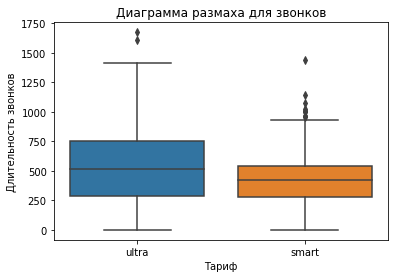

In [96]:
#построим boxplot для длительность разговоров
sns.boxplot(y='calls_duration', x = 'tariff', data = final_df)
plt.title('Диаграмма размаха для звонков')
plt.xlabel("Тариф")  
plt.ylabel("Длительность звонков")

In [55]:
#Напишем функцию для определения интервала, значения выходящие за пределы которого являются выбросами 
def outliers(column, tariff_types):
    tariff_types = 'tariff'
    type_1 = 'smart'
    type_2 = 'ultra'
    q1_0 = final_df[final_df[tariff_types] == type_1][column].quantile(0.25)
    q3_0 = final_df[final_df[tariff_types] == type_1][column].quantile(0.75)
    diff_0 = q3_0 - q1_0
    left_int_0 = np.where( (q1_0 - 1.5*diff_0) > 0, q1_0 - 1.5*diff_0, 0)
    right_int_0 = np.where( (q3_0 + 1.5*diff_0) > 0, q3_0 + 1.5*diff_0, 0)
    q1_1 = final_df[final_df[tariff_types] == type_2][column].quantile(0.25)
    q3_1 = final_df[final_df[tariff_types] == type_2][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    left_int_1 = np.where( (q1_0 - 1.5*diff_1) > 0, q1_0 - 1.5*diff_1, 0)
    right_int_1 = np.where( (q3_0 + 1.5*diff_1) > 0, q3_0 + 1.5*diff_1, 0)
    return(left_int_0, right_int_0), (left_int_1, right_int_1)

In [56]:
#определим границы интервала для длительности звонков
calls_dur_smart, calls_dur_ultra = outliers('calls_duration', 'tariff')
print(calls_dur_smart, calls_dur_ultra)

(array(0.), array(939.5)) (array(0.), array(1247.))


- Интервал для тарифа 'smart': от 0 до 939,5; 
- Интервал для тарифа 'ultra': от 0 до 1247.

In [57]:
#определим границы интервала для длительности интернет-сессий
mb_used_smart, mb_used_ultra = outliers('mb_used_sum', 'tariff')
print(mb_used_smart, mb_used_ultra)

(array(1537.), array(31105.)) (array(0.), array(42589.))


- Интервал для тарифа 'smart': от 1537 до 31105;
- Интервад для тарифа 'ultra': от 0 до 42589. 

In [58]:
#определим границы интервала для сообщений
messages_smart, messages_ultra = outliers('messages_count', 'tariff')
print(messages_smart, messages_ultra)

(array(0.), array(112.5)) (array(0.), array(160.5))


- Интервал для тарифа 'smart': от 0 до 112,5;
- Интервад для тарифа 'ultra': от 0 до 160,5.

In [59]:
#создадим новые датасеты с исключением значений, выходящих за границу выявленных интервалов для каждого из двух тарифов
smart_data_filtered = final_df.query('tariff == "smart" & 0 < calls_duration < 940 & 1537 < mb_used_sum < 31105 & 0 < messages_count < 113')
ultra_data_filtered = final_df.query('tariff == "ultra" & 0 < calls_duration < 1247 & 0 < mb_used_sum < 42589 & 0 < messages_count < 161')

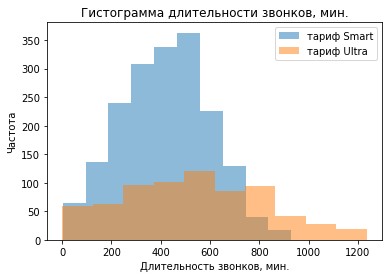

Для тарифа Smart cреднее значение длительности звонков составляет: 419
стандартное отклонение: 179
дисперсия: 31868

Для тарифа Ultra cреднее значение длительности звонков составляет: 535
стандартное отклонение: 283
дисперсия: 80265

Параметр скошенности распределения длительности звонков для тарифа Smart составляет -0.01
Параметр скошенности распределения длительности звонков для тарифа Ultra составляет 0.20


In [60]:
#построим распределение длительности звонков для каждого из тарифов
plt.hist(smart_data_filtered['calls_duration'], alpha=0.5, label = 'тариф Smart')
plt.hist(ultra_data_filtered['calls_duration'], alpha=0.5, label = 'тариф Ultra')
plt.legend(loc='upper right')
plt.title('Гистограмма длительности звонков, мин.')
plt.xlabel("Длительность звонков, мин.")  
plt.ylabel("Частота")
plt.show()
#рассчитаем среднее значение, дисперсию и стандартное отклонение для длительности звонков
smart_calls_mean = smart_data_filtered['calls_duration'].mean()
smart_calls_std = smart_data_filtered['calls_duration'].std()
smart_calls_var = smart_data_filtered['calls_duration'].var()
ultra_calls_mean = ultra_data_filtered['calls_duration'].mean()
ultra_calls_std = ultra_data_filtered['calls_duration'].std()
ultra_calls_var = ultra_data_filtered['calls_duration'].var()
print('Для тарифа Smart cреднее значение длительности звонков составляет: {:.0f}\nстандартное отклонение: {:.0f}\nдисперсия: {:.0f}\n'.format(smart_calls_mean, smart_calls_std, smart_calls_var))
print('Для тарифа Ultra cреднее значение длительности звонков составляет: {:.0f}\nстандартное отклонение: {:.0f}\nдисперсия: {:.0f}\n'.format(ultra_calls_mean, ultra_calls_std, ultra_calls_var))
#Посмотрим на параметр скошенности распределения
smart_calls_skewness = smart_data_filtered['calls_duration'].skew()
ultra_calls_skewness = ultra_data_filtered['calls_duration'].skew()
print('Параметр скошенности распределения длительности звонков для тарифа Smart составляет {:.2f}'.format(smart_calls_skewness))
print('Параметр скошенности распределения длительности звонков для тарифа Ultra составляет {:.2f}'.format(ultra_calls_skewness))

**В среднем пользователь тарифа "Смарт" тратит в месяц 419 минут, что довольно близко к лимиту в 550 рублей. След-но, пользователь практически полностью тратит предложенный лимит. На тарифе "Ультра" пользователь, напротив, наговаривает за месяц в среднем 535 минут, что почти 6 раз меньше предлагаемого тарифом лимита в 3000 минут.**

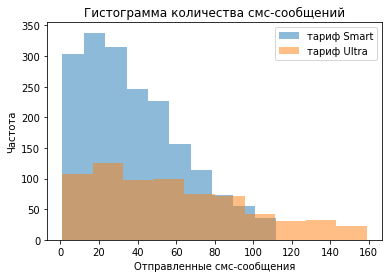

Для тарифа Smart cреднее значение количества отправленных сообщений составляет: 38
стандартное отклонение: 26
дисперсия: 659

Для тарифа Ultra cреднее значение количества отправленных сообщений составляет: 58
стандартное отклонение: 40
дисперсия: 1608

Параметр скошенности распределения количества отправленных сообщений для тарифа Smart составляет 0.68
Параметр скошенности распределения количества отправленных сообщений для тарифа Ultra составляет 0.20


In [61]:
#построим гистограмму для количества сообщения пользователей двух тарифов
#построим распределение длительности звонков для каждого из тарифов
plt.hist(smart_data_filtered['messages_count'], alpha=0.5, label = 'тариф Smart')
plt.hist(ultra_data_filtered['messages_count'], alpha=0.5, label = 'тариф Ultra')
plt.legend(loc='upper right')
plt.title('Гистограмма количества смс-сообщений')
plt.xlabel("Отправленные смс-сообщения")  
plt.ylabel("Частота")
plt.show()
#рассчитаем среднее значение, дисперсию и стандартное отклонение 
smart_sms_mean = smart_data_filtered['messages_count'].mean()
smart_sms_std = smart_data_filtered['messages_count'].std()
smart_sms_var = smart_data_filtered['messages_count'].var()
ultra_sms_mean = ultra_data_filtered['messages_count'].mean()
ultra_sms_std = ultra_data_filtered['messages_count'].std()
ultra_sms_var = ultra_data_filtered['messages_count'].var()
print('Для тарифа Smart cреднее значение количества отправленных сообщений составляет: {:.0f}\nстандартное отклонение: {:.0f}\nдисперсия: {:.0f}\n'.format(smart_sms_mean, smart_sms_std, smart_sms_var))
print('Для тарифа Ultra cреднее значение количества отправленных сообщений составляет: {:.0f}\nстандартное отклонение: {:.0f}\nдисперсия: {:.0f}\n'.format(ultra_sms_mean, ultra_sms_std, ultra_sms_var))
#Посмотрим на параметр скошенности распределения
smart_sms_skewness = smart_data_filtered['messages_count'].skew()
ultra_sms_skewness = ultra_data_filtered['messages_count'].skew()
print('Параметр скошенности распределения количества отправленных сообщений для тарифа Smart составляет {:.2f}'.format(smart_sms_skewness))
print('Параметр скошенности распределения количества отправленных сообщений для тарифа Ultra составляет {:.2f}'.format(ultra_calls_skewness))

**В целом, как пользователи тарифа "Смарт", так и пользователи тарифа "Ультра" пользуются сообщениями неактивно. Абоненты тарифа "Смарт" в среднем только наполовину используют предлагаемый лимит сообщений, пользователи тарифа "Ультра" в среднем отправляют 58 сообщений, что аж в 20 раз меньше предложенного лимита в 1000 сообщений.**

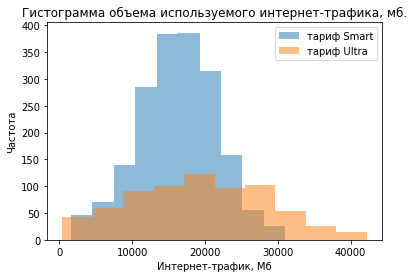

Для тарифа Smart cреднее значение используемого интернет-трафика составляет: 16202
стандартное отклонение: 5440
дисперсия: 29592819

Для тарифа Ultra cреднее значение используемого интернет-трафика составляет: 19277
стандартное отклонение: 9224
дисперсия: 85074089

Параметр скошенности распределения используемого интернет-трафика для тарифа Smart составляет -0.16
Параметр скошенности распределения используемого интернет-трафика для тарифа Ultra составляет 0.20


In [62]:
#построим гистограмму для объема используемого интернет-трафика 
plt.hist(smart_data_filtered['mb_used_sum'], alpha=0.5, label = 'тариф Smart')
plt.hist(ultra_data_filtered['mb_used_sum'], alpha=0.5, label = 'тариф Ultra')
plt.legend(loc='upper right')
plt.title('Гистограмма объема используемого интернет-трафика, мб.')
plt.xlabel("Интернет-трафик, Мб")  
plt.ylabel("Частота")
plt.show()
#рассчитаем среднее значение, дисперсию и стандартное отклонение
smart_sms_mean = smart_data_filtered['mb_used_sum'].mean()
smart_sms_std = smart_data_filtered['mb_used_sum'].std()
smart_sms_var = smart_data_filtered['mb_used_sum'].var()
ultra_sms_mean = ultra_data_filtered['mb_used_sum'].mean()
ultra_sms_std = ultra_data_filtered['mb_used_sum'].std()
ultra_sms_var = ultra_data_filtered['mb_used_sum'].var()
print('Для тарифа Smart cреднее значение используемого интернет-трафика составляет: {:.0f}\nстандартное отклонение: {:.0f}\nдисперсия: {:.0f}\n'.format(smart_sms_mean, smart_sms_std, smart_sms_var))
print('Для тарифа Ultra cреднее значение используемого интернет-трафика составляет: {:.0f}\nстандартное отклонение: {:.0f}\nдисперсия: {:.0f}\n'.format(ultra_sms_mean, ultra_sms_std, ultra_sms_var))
#Посмотрим на параметр скошенности распределения
smart_sms_skewness = smart_data_filtered['mb_used_sum'].skew()
ultra_sms_skewness = ultra_data_filtered['mb_used_sum'].skew()
print('Параметр скошенности распределения используемого интернет-трафика для тарифа Smart составляет {:.2f}'.format(smart_sms_skewness))
print('Параметр скошенности распределения используемого интернет-трафика для тарифа Ultra составляет {:.2f}'.format(ultra_calls_skewness))

**В среднем пользователи тарифа "Смарт" выходят за лимит в 15 Гб, предлагаемый тарифом, и расходуют 16,2 Гб интернет-трафика. Пользователи тарифа "Ультра" в среднем, напротив,расходуют интернет-трафик значительно меньше лимита: 19,3 ГБ против вместо лимита в 30 Гб.**

## 4. Проверка гипотез <a name="paragraph4"></a> 

### 4.1 Проверка первой гипотезы <a name="subparagraph5"></a> 
H0: средняя выручка пользователей тарифа "Ультра" равна средней выручке пользователей тарифа "Смарт";

H1: средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Text(0, 0.5, 'Выручка')

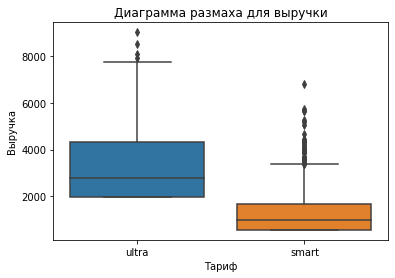

In [97]:
#создадим новый датасет с исключением аномальных значений выручки
#построим диаграмму размаха 
sns.boxplot(y='total_revenue', x = 'tariff', data = final_df)
plt.title('Диаграмма размаха для выручки')
plt.xlabel("Тариф")  
plt.ylabel("Выручка")

In [64]:
#Определим верхнюю и нижнюю границу допустимого интервала значений выручки, не выходящих за пределы расстояния, равного 1,5 межквартильного размаха
revenue_smart, revenue_ultra = outliers('total_revenue', 'tariff')
print(revenue_smart, revenue_ultra)

(array(0.), array(3363.5)) (array(0.), array(5186.9))


- Интервал для тарифа 'smart': от 0 до 3364;
- Интервал для тарифа 'ultra': от 0 до 5187.

In [65]:
#создадим датасет с исключением аномальных значений выручка для тарифов 'smart' и 'ultra'
revenue_smart_filtered = final_df.query('tariff == "smart" & 0 < total_revenue < 3364').loc[:, 'total_revenue']
revenue_ultra_filtered = final_df.query('tariff == "ultra" & 0 < total_revenue < 5187').loc[:, 'total_revenue']

In [79]:
#посмотрим на скошенность распределения выручки для двух тарифов 
revenue_smart_skewness = revenue_smart_filtered.skew()
revenue_ultra_skewness = revenue_ultra_filtered.skew()
print(revenue_smart_skewness)
print(revenue_ultra_skewness)

1.0223963473600517
0.7820314105529439


Произведем проверку равенства дисперсии выборок. Поскольку мы избавились от выбросов, будем полагать, что не наблюдается значительных отклонений от нормального распределения в двух выборках. Следовательно, будем использовать критерий Бартлетта.

H0: две выборки имеют равную дисперсию.

In [99]:
from scipy import stats as st
from scipy.stats import bartlett
stat, p = bartlett(revenue_smart_filtered, revenue_ultra_filtered)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


На основании теста Бартлетта мы отвергаем гипотезу о равенстве дисперсий в выборках с данными о выручке для тарифов Смарт и Ультра.

*Поскольку мы имеем две независимые генеральные совокупности, произведем проверку гипотезы о равенстве средних значений методом scipy.stats.ttest_ind (array1, array2, equal_var). Пороговое значение alpha зададим на уровне 0.05. Поскольку мы установили, что мера разброса данных в двух выборках различается, установим параметр equal_var равным False.*

In [86]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(revenue_smart_filtered, revenue_ultra_filtered, equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.873809975989362e-259
Отвергаем нулевую гипотезу


*Вывод по первой гипотезе*

Нулевую гипотезу отвергаем. Следовательно, средняя выручка пользователей двух тарифов различается. Проверим, для какого тарифа средняя выручка выше. 


In [68]:
print('Средняя выручка от пользователей тарифа "Smart" - {:.2f}'.format(revenue_smart_filtered.mean()))
print('Средняя выручка от пользователей тарифа "Ultra" - {:.2f}'.format(revenue_ultra_filtered.mean()))

Средняя выручка от пользователей тарифа "Smart" - 1186.26
Средняя выручка от пользователей тарифа "Ultra" - 2853.41


*Средняя выручка от пользователей тарифа "Ultra" выше, чем от пользователей тарифа "Smart".*

### 4.2 Проверка второй гипотезы <a name="subparagraph6"></a>
H0: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Text(0, 0.5, 'Выручка')

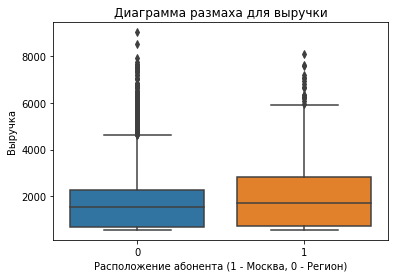

In [87]:
#создадим дамми-переменную, принимающую значение, равное единице - если Москва, и нулю - если регионы
final_df['Moscow_city'] = np.where(final_df['city'] == 'Москва', 1, 0)
#построим диаграмму размаха
sns.boxplot(y='total_revenue', x = 'Moscow_city', data = final_df)
plt.title('Диаграмма размаха для выручки')
plt.xlabel("Расположение абонента (1 - Москва, 0 - Регион)")  
plt.ylabel("Выручка")

In [70]:
#Напишем функцию для определения интервала, значения выходящие за пределы которого являются выбросами 
def outliers_location(column, location):
    tariff_types = 'Moscow_city'
    moscow = 1
    region = 0
    q1_0 = final_df[final_df[tariff_types] == moscow][column].quantile(0.25)
    q3_0 = final_df[final_df[tariff_types] == moscow][column].quantile(0.75)
    diff_0 = q3_0 - q1_0
    
    left_int_0 = np.where( (q1_0 - 1.5*diff_0) > 0, q1_0 - 1.5*diff_0, 0)
    right_int_0 = np.where( (q3_0 + 1.5*diff_0) > 0, q3_0 + 1.5*diff_0, 0)
    q1_1 = final_df[final_df[tariff_types] == region][column].quantile(0.25)
    q3_1 = final_df[final_df[tariff_types] == region][column].quantile(0.75)
    diff_1 = q3_1 - q1_1
    left_int_1 = np.where( (q1_0 - 1.5*diff_1) > 0, q1_0 - 1.5*diff_1, 0)
    right_int_1 = np.where( (q3_0 + 1.5*diff_1) > 0, q3_0 + 1.5*diff_1, 0)
    return(left_int_0, right_int_0), (left_int_1, right_int_1)

In [71]:
#Определим верхнюю и нижнюю границу допустимого интервала значений выручки, не выходящих за пределы расстояния, равного 1,5 межквартильного размаха
revenue_moscow, revenue_region = outliers_location('total_revenue', 'Moscow_city')
print(revenue_moscow, revenue_region)
#Интервал для Москвы: от 0 до 5961;
#Интервал для регионов: от 0 до 5195.

(array(0.), array(5961.15)) (array(0.), array(5194.5))


In [72]:
#создадим датасет с исключением аномальных значений выручка для тарифов 'smart' и 'ultra'
revenue_moscow_filtered = final_df.query('city == "Москва" & 0 < total_revenue < 5961').loc[:, 'total_revenue']
revenue_region_filtered = final_df.query('city != "Москва" & 0 < total_revenue < 5195').loc[:, 'total_revenue']

Произведем проверку равенства дисперсии выборок. Поскольку мы избавились от выбросов, будем полагать, что не наблюдается значительных отклонений от нормального распределения в двух выборках. Следовательно, будем использовать критерий Бартлетта.

H0: две выборки имеют равную дисперсию. 

In [100]:
stat, p = bartlett(revenue_moscow_filtered, revenue_region_filtered)
if (p < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


На основании теста Бартлетта мы отвергаем гипотезу о равенстве дисперсий в выборках с данными о выручке, формируемой за счет абонентов в регионе и в Москве.

In [101]:
#поскольку мы имеем две независимые генеральные совокупности, произведем проверку гипотезы о равенстве средних значений методом scipy.stats.ttest_ind (array1, array2, equal_var)
#Поскольку мы установили, что мера разброса данных в двух выборках различается, установим параметр equal_var равным False.
#пороговое значение alpha зададим на уровне 0.05
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(revenue_moscow_filtered, revenue_region_filtered, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.071201461450415e-06
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем. Следовательно, средняя выручка пользователей из Москвы и регионов различается. Проверим, в какому случае выручка выше. 

In [102]:
print('Средняя выручка по пользователю в месяц в Москве: {:.2f}'.format(revenue_moscow_filtered.mean()))
print('Средняя выручка по пользователю в месяц в регионах: {:.2f}'.format(revenue_region_filtered.mean()))

Средняя выручка по пользователю в месяц в Москве: 1929.30
Средняя выручка по пользователю в месяц в регионах: 1652.77


*Средняя выручка, формируемая за счет московских абонентов, на 276 руб. превосходит выручку от региональных абонентов.*

# 5. Общий вывод <a name="paragraph5"></a>

Из проведенного анализа можно сделать следующие выводы:
- средняя выручка, генерируемая тарифом «Ультра» выше, чем выручка от тарифа «Смарт»;
- средний пользователь тарифа «Смарт» близок к лимиту по звонкам, в то время как пользователи тарифа «Ультра» недоиспользуют лимит по минутам разговора;
- среднему пользователю тарифа «Смарт» не хватает предложенного лимита интернет-трафика, ему приходится дополнительно приобретать 1,2 Гб интернет-трафика;
- пользователи тарифа «Смарт» и тарифа «Ультра» неактивно используют смс-сообщения. 

Из этого следует, что оператору можно рассмотреть возможность разработки промежуточного варианта между тарифом «Смарт» и «Ультра», который предлагает больший объем интернет-трафика и минут разговора по стоимости выше тарифа «Смарт» и ниже цены «Ультра». Данный тариф позволит пользователю комфортно пользоваться пакетом интернета, не дозаказывая дополнительные ГБ трафика. 
